<a href="https://colab.research.google.com/github/JuarezEmmanuel/Data-Science-Python/blob/main/Agrupamiento_y_Filtrado_de_Datos_en_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agrupamiento y Filtrado de Datos en Pandas

**Juarez Emmanuel**

**Objetivo:**

Realizar operaciones avanzadas de agrupamiento y filtrado de datos, utilizando el conjunto de datos de venta_llantas.xlsx . En esta sesión aprenderán a agrupar datos para calcular estadísticas agregadas y filtrar grandes conjuntos de datos según condiciones específicas.

**Temario :**
* Agrupamiento de Datos
* Filtrado de Datos
* Aplicación de Funciones Agregadas Personalizadas
* Exploración Dinámica con Agrupamientos y Filtros Combinados
* Ejemplo Completo: Agrupamiento y Filtrado para el Análisis de Ventas

* Agrupar los datos de manera eficiente utilizando groupby() y aplicar funciones agregadas como suma y promedio.
* Aplicar filtros simples y combinados usando condiciones lógicas.
* Crear funciones personalizadas para aplicar en los datos agrupados.
* Explorar y analizar subconjuntos de datos mediante combinaciones de agrupamientos y filtros.


In [30]:
import pandas as pd
import numpy as np

In [31]:
!pip install -U gdown

In [32]:
!gdown 1kFa35DYNnfLzAAMEwE7pGwa0RiZN48_n

Downloading...
From: https://drive.google.com/uc?id=1kFa35DYNnfLzAAMEwE7pGwa0RiZN48_n
To: /content/venta_llantas.xlsx
100% 10.7M/10.7M [00:00<00:00, 38.3MB/s]


In [33]:
df = pd.read_excel('venta_llantas.xlsx')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127266 entries, 0 to 127265
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   IdCliente      127255 non-null  object        
 1   NombreCliente  127255 non-null  object        
 2   Fecha          127255 non-null  datetime64[ns]
 3   Empleado       127255 non-null  float64       
 4   Referencia     127255 non-null  object        
 5   Descripcion    127255 non-null  object        
 6   CodigoFamilia  127255 non-null  float64       
 7   Familia        127255 non-null  object        
 8   Cantidad       127255 non-null  float64       
 9   Ventas         127255 non-null  float64       
 10  Localidad      127255 non-null  object        
 11  Sede           127256 non-null  object        
 12  Area           127255 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 12.6+ MB


In [35]:
df.head()

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,2016-09-01,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1.0,129310.0,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,2016-09-01,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2.0,181034.0,Suba,Suba,32.0
2,C2865810,PINEDA JAIME,2016-09-01,12.0,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1.0,193095.0,Usaquen,Santa ana,33.0
3,C11210285,VILLALBA RODRIGUEZ FABIO,2016-09-01,24.0,LL-TCA-0009,ENERGY XM2 165/65R13,101.0,LLANTA,2.0,262069.0,Puente aranda,Calle 13,35.0
4,C80755314,MOLINA RONALD,2016-09-01,14.0,LL-TCA-0132,NO UTILIZAR,101.0,LLANTA,4.0,362069.0,Suba,Suba,32.0


In [36]:
# Agrupar por sede y Sumar las ventas

ventas_por_sede = df.groupby('Sede')['Ventas'].sum()
ventas_por_sede

,Ventas
Sede,
,0.000000e+00
Av Chile,3.393520e+09
Calle 13,2.942282e+09
Calle 80,7.010584e+09
Grandes flotas,1.240896e+10
Santa ana,2.409423e+09
Suba,1.474764e+09
Ventas externas,4.478655e+10


In [37]:
# Mostrar valores Enteros

pd.options.display.float_format = '{:,.0f}'.format

In [38]:
ventas_por_sede = df.groupby('Sede')['Ventas'].sum()
ventas_por_sede

,Ventas
Sede,
,0
Av Chile,"3,393,520,053"
Calle 13,"2,942,281,891"
Calle 80,"7,010,583,899"
Grandes flotas,"12,408,960,022"
Santa ana,"2,409,422,995"
Suba,"1,474,764,027"
Ventas externas,"44,786,548,709"


In [39]:
# Asegurar que la columna fecha este en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [40]:
# crea una columna para el Año
df['Año'] = df['Fecha'].dt.year.astype(str)

In [41]:
# Agrupar por sede y año, sumar la cantidad vendida
ventas_por_sede_año = df.groupby(['Sede', 'Año'])['Ventas'].sum()
ventas_por_sede_año

Sede             Año   
                 nan                   0
Av Chile         2016.0      174,390,919
                 2017.0      798,122,593
                 2018.0    1,208,556,597
                 2019.0    1,053,181,313
                 2020.0      159,268,631
Calle 13         2016.0      265,758,352
                 2017.0      701,755,811
                 2018.0      879,410,311
                 2019.0      934,385,344
                 2020.0      160,972,073
Calle 80         2016.0      716,113,198
                 2017.0    1,834,533,338
                 2018.0    1,884,424,454
                 2019.0    2,217,059,144
                 2020.0      358,453,765
Grandes flotas   2016.0      888,291,671
                 2017.0    2,785,929,096
                 2018.0    3,810,145,207
                 2019.0    3,316,214,648
                 2020.0    1,608,379,400
Santa ana        2016.0      264,111,514
                 2017.0      647,161,122
                 2018.0      704,664,842
                 2019.0      641,897,708
                 2020.0      151,587,809
Suba             2016.0      188,429,080
                 2017.0      426,323,989
                 2018.0      424,481,779
                 2019.0      370,992,679
                 2020.0       64,536,500
Ventas externas  2016.0    4,429,341,987
                 2017.0   14,429,157,399
                 2018.0   11,741,745,055
                 2019.0   12,461,931,571
                 2020.0    1,724,372,697
Name: Ventas, dtype: float64

In [42]:
# Filtrar donde la cantidad es mayor a 2
filtro_cantidad = df[df['Cantidad'] > 2]
filtro_cantidad

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Año
4,C80755314,MOLINA RONALD,2016-09-01,14,LL-TCA-0132,NO UTILIZAR,101,LLANTA,4,"362,069",Suba,Suba,32,2016.0
5,C21111935,URQUIJO MERCEDES,2016-09-01,14,LL-TCA-0022,ENERGY XM2 185/70R14,101,LLANTA,4,"720,690",Suba,Suba,32,2016.0
9,C19091837,URIBE GABRIEL,2016-09-01,12,LL-TCA-0114,PRIMACY 3 205/60R16,101,LLANTA,4,"1,167,069",Usaquen,Santa ana,33,2016.0
14,C900280249,L&S LOGISTICA Y SUMINISTROS S.A.S.,2016-09-01,24,LL-PLB-0016,X INCITY XZU3 215/75R17.5,101,LLANTA,4,"2,034,483",Puente aranda,Calle 13,35,2016.0
22,C860024586,PAVIMENTOS COLOMBIA SAS,2016-09-01,2,LL-TCC-0135,LTX FORCE 265/65R17,101,LLANTA,5,"2,653,448",Engativa,Ventas externas,22,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127250,C891100881,MORENO VARGAS SOCIEDAD ANONIMA,2020-03-10,2,LL-PLC-0159,X WORKS HD XDY 12R22.5,101,LLANTA,4,"5,635,766",Engativa,Ventas externas,22,2020.0
127251,C900364615,ORGANIZACION SUMA SAS,2020-03-10,1,LL-PLB-0024,X MULTI Z 235/75R17.5,101,LLANTA,9,"6,894,000",Engativa,Ventas externas,22,2020.0
127252,C900365651,EMPRESA DE TRANSPORTE INTEGRADO DE BOGOTA ETIB...,2020-03-10,2,LL-PLB-0024,X MULTI Z 235/75R17.5,101,LLANTA,20,"11,955,636",Engativa,Ventas externas,22,2020.0
127253,C900365651,EMPRESA DE TRANSPORTE INTEGRADO DE BOGOTA ETIB...,2020-03-10,2,LL-PLB-0031,XZE2 215/75 R17.5,101,LLANTA,30,"15,908,063",Engativa,Ventas externas,22,2020.0


In [43]:
# Filtrar con condiciones múltiples usando el operador lógico &
filtro_condiciones = df[(df['Cantidad'] > 2) & (df['Ventas'] > 100000)]
filtro_condiciones

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Año
4,C80755314,MOLINA RONALD,2016-09-01,14,LL-TCA-0132,NO UTILIZAR,101,LLANTA,4,"362,069",Suba,Suba,32,2016.0
5,C21111935,URQUIJO MERCEDES,2016-09-01,14,LL-TCA-0022,ENERGY XM2 185/70R14,101,LLANTA,4,"720,690",Suba,Suba,32,2016.0
9,C19091837,URIBE GABRIEL,2016-09-01,12,LL-TCA-0114,PRIMACY 3 205/60R16,101,LLANTA,4,"1,167,069",Usaquen,Santa ana,33,2016.0
14,C900280249,L&S LOGISTICA Y SUMINISTROS S.A.S.,2016-09-01,24,LL-PLB-0016,X INCITY XZU3 215/75R17.5,101,LLANTA,4,"2,034,483",Puente aranda,Calle 13,35,2016.0
22,C860024586,PAVIMENTOS COLOMBIA SAS,2016-09-01,2,LL-TCC-0135,LTX FORCE 265/65R17,101,LLANTA,5,"2,653,448",Engativa,Ventas externas,22,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127250,C891100881,MORENO VARGAS SOCIEDAD ANONIMA,2020-03-10,2,LL-PLC-0159,X WORKS HD XDY 12R22.5,101,LLANTA,4,"5,635,766",Engativa,Ventas externas,22,2020.0
127251,C900364615,ORGANIZACION SUMA SAS,2020-03-10,1,LL-PLB-0024,X MULTI Z 235/75R17.5,101,LLANTA,9,"6,894,000",Engativa,Ventas externas,22,2020.0
127252,C900365651,EMPRESA DE TRANSPORTE INTEGRADO DE BOGOTA ETIB...,2020-03-10,2,LL-PLB-0024,X MULTI Z 235/75R17.5,101,LLANTA,20,"11,955,636",Engativa,Ventas externas,22,2020.0
127253,C900365651,EMPRESA DE TRANSPORTE INTEGRADO DE BOGOTA ETIB...,2020-03-10,2,LL-PLB-0031,XZE2 215/75 R17.5,101,LLANTA,30,"15,908,063",Engativa,Ventas externas,22,2020.0


In [44]:
# Definir una función personalizada para calcular el promedio ponderado
def promedio_ponderado(x):
    return (x['Cantidad'] * x['Ventas']).sum() / x['Cantidad'].sum()

# Agrupar por sede y aplicar la función personalizada
promedio_ventas_por_sede = df.groupby('Sede').apply(promedio_ponderado)
promedio_ventas_por_sede

/tmp/ipython-input-1355520081.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return (x['Cantidad'] * x['Ventas']).sum() / x['Cantidad'].sum()
/tmp/ipython-input-1355520081.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promedio_ventas_por_sede = df.groupby('Sede').apply(promedio_ponderado)


,0
Sede,
,NaN
Av Chile,"505,705"
Calle 13,"400,236"
Calle 80,"306,620"
Grandes flotas,"9,796,882"
Santa ana,"420,149"
Suba,"137,823"
Ventas externas,"13,927,356"


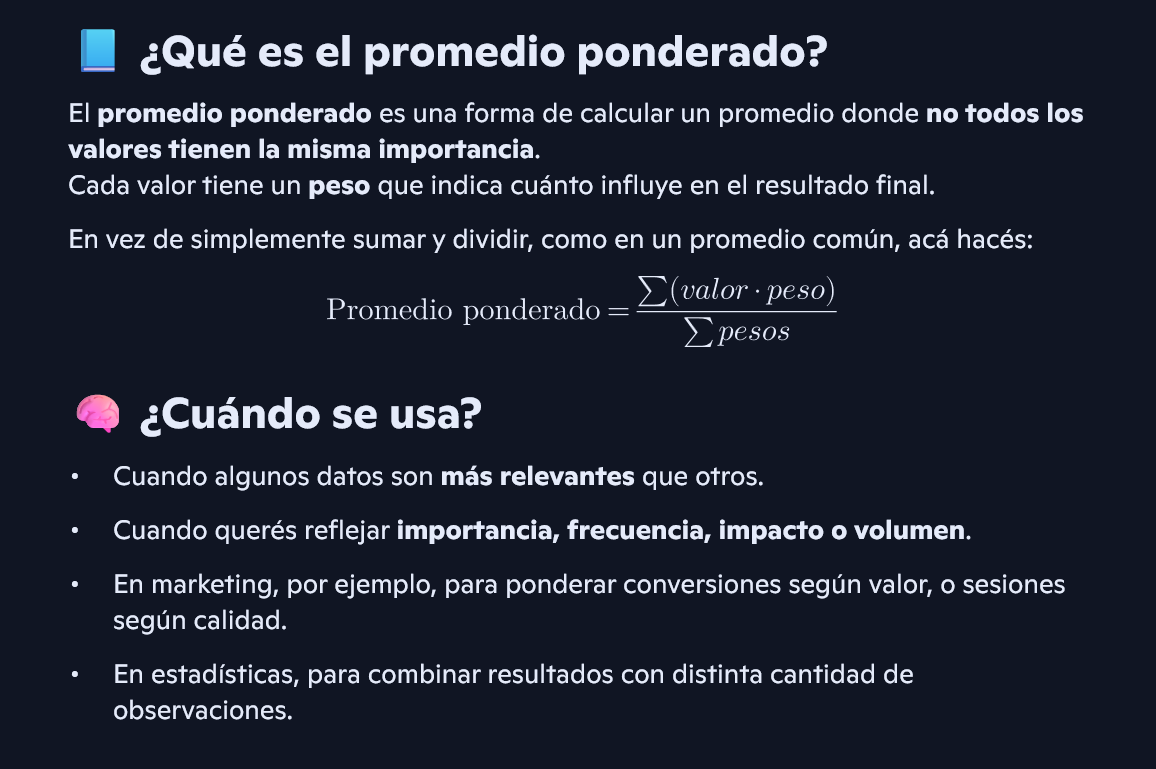

**Ventas = valor**

**Cantidad = peso**

In [45]:
pd.reset_option('display.float_format')

In [46]:
# calcular un descuento del 10% sobre las ventas y mostrar el total con el descuento aplicado

# Definir la función para calcular el total de ventas con descuento
def aplicar_descuento(row):
    descuento = 0.10  # Descuento del 10%
    return row['Ventas'] - (row['Ventas'] * descuento)

# Aplicar la función a cada fila y crear una nueva columna 'VentasConDescuento'
df['VentasConDescuento'] = df.apply(aplicar_descuento, axis=1)
# axis=0: Aplica la función a cada columna
# axis=1: Aplica la función a cada fila.

# Mostrar las primeras filas con la nueva columna
df[['Ventas', 'VentasConDescuento']].head(20)

,Ventas,VentasConDescuento
0,129310.0,116379.0
1,181034.0,162930.6
2,193095.0,173785.5
3,262069.0,235862.1
4,362069.0,325862.1
5,720690.0,648621.0
6,737931.0,664137.9
7,931034.0,837930.6
8,950015.0,855013.5
9,1167069.0,1050362.1


In [47]:
# calcular el costo por metro cuadrado del área utilizada para cada venta, es decir, dividir el total de ventas entre el área total utilizada

# Definir la función para calcular el costo por área total utilizada
def costo_por_area(row):
    if row['Area'] > 0:  # Asegurarse de que el área no sea cero
        return row['Ventas'] / (row['Cantidad'] * row['Area'])
    else:
        return 0

# Aplicar la función a cada fila y crear una nueva columna 'CostoPorArea'
df['CostoPorArea'] = df.apply(costo_por_area, axis=1)

# Mostrar las primeras filas con la nueva columna
print(df[['Ventas', 'Cantidad', 'Area', 'CostoPorArea']].head())

     Ventas  Cantidad  Area  CostoPorArea
0  129310.0       1.0  35.0   3694.571429
1  181034.0       2.0  32.0   2828.656250
2  193095.0       1.0  33.0   5851.363636
3  262069.0       2.0  35.0   3743.842857
4  362069.0       4.0  32.0   2828.664062


In [48]:
# clasificar cada venta como "Alta", "Media" o "Baja" dependiendo del monto de las ventas

# Definir una función para clasificar las ventas
def clasificar_ventas(row):
    if row['Ventas'] > 2000000:
        return 'Alta'
    elif row['Ventas'] > 100000:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la función a cada fila y crear una nueva columna 'CategoriaVenta'
df['CategoriaVenta'] = df.apply(clasificar_ventas, axis=1)

# Mostrar las primeras filas con la nueva columna
print(df[['Ventas', 'CategoriaVenta']].head(20))

       Ventas CategoriaVenta
0    129310.0          Media
1    181034.0          Media
2    193095.0          Media
3    262069.0          Media
4    362069.0          Media
5    720690.0          Media
6    737931.0          Media
7    931034.0          Media
8    950015.0          Media
9   1167069.0          Media
10  1324483.0          Media
11  1324483.0          Media
12  1429173.0          Media
13  1668690.0          Media
14  2034483.0           Alta
15      862.0           Baja
16  2250828.0           Alta
17     2069.0           Baja
18  2250828.0           Alta
19  2648965.0           Alta
